In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
sns.set(style="whitegrid")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# I. Thao tác với đặc trưng

## Lựa chọn đặc trưng

In [2]:
_2019_df = pd.read_csv('Data/2019_df.csv')

Để hỗ trợ cho việc phân tích và xây dựng mô hình, chuẩn hóa các giá trị string của 2 nhóm **sex** và **race/ethnicityage_group** thành int theo chuẩn dưới đây:
- **Sex:**
  - Overall: 0
  - Male: 1
  - Female: 2
- **Race/Ethnicityage:**
  - Overall: 0
  - White: 1
  - Black: 2
  - Hispanic: 3
  - Asian and Pacific Islander: 4 
  - American Indian and Alaskan Native: 5

In [3]:
race_group = {'Overall': 0, 'White': 1, 'Black': 2, 'Hispanic': 3, 'Asian and Pacific Islander': 4, 'American Indian and Alaskan Native': 5}
sex_group = {'Overall': 0, 'Male': 1, 'Female': 2}

In [4]:
_2019_df['sex'] = _2019_df['sex'].map(sex_group)
_2019_df['race/ethnicityage_group'] = _2019_df['race/ethnicityage_group'].map(race_group)

In [5]:
_2019_df

,locationabbr,locationdesc,data_value,sex,race/ethnicityage_group,locationid,y_lat,x_lon
0,AK,Aleutians East,182.4,0,0,2013,55.442393,-161.959930
1,AK,Aleutians West,172.6,0,0,2016,53.648343,-166.917533
2,AK,Anchorage,255.6,0,0,2020,61.159145,-149.104559
3,AK,Bethel,343.4,0,0,2050,60.923648,-159.753262
4,AK,Denali,218.6,0,0,2068,63.678820,-149.960801
...,...,...,...,...,...,...,...,...
33064,WY,Wyoming,194.9,0,3,56,42.998400,-107.552000
33065,WY,Wyoming,287.0,1,3,56,42.998400,-107.552000
33066,WY,Wyoming,121.0,2,3,56,42.998400,-107.552000
33067,WY,Wyoming,338.4,0,5,56,42.998400,-107.552000


**Chọn sample:** Chọn bang có nhiều mẫu nhất để phân tích

In [6]:
_2019_df['locationdesc'].value_counts()

locationdesc
Washington County    326
Jefferson County     273
Jackson County       234
Franklin County      233
Lincoln County       213
                    ... 
Fajardo Municipio      3
Dorado Municipio       3
Aleutians West         2
Petersburg             2
Aleutians East         1
Name: count, Length: 2014, dtype: int64

Bang có nhiều dữ liệu nhất là **Washington County**

In [7]:
washington_df = _2019_df[_2019_df['locationdesc'] == 'Washington County']
washington_df

,locationabbr,locationdesc,data_value,sex,race/ethnicityage_group,locationid,y_lat,x_lon
298,AL,Washington County,410.5,0,0,1129,31.412940,-88.205917
365,AL,Washington County,570.6,1,0,1129,31.412940,-88.205917
432,AL,Washington County,301.7,2,0,1129,31.412940,-88.205917
499,AL,Washington County,407.3,0,1,1129,31.412940,-88.205917
566,AL,Washington County,546.9,1,1,1129,31.412940,-88.205917
...,...,...,...,...,...,...,...,...
32332,WI,Washington County,171.9,0,4,55131,43.372311,-88.226499
32351,WI,Washington County,230.4,1,4,55131,43.372311,-88.226499
32366,WI,Washington County,158.1,2,4,55131,43.372311,-88.226499
32392,WI,Washington County,397.2,0,5,55131,43.372311,-88.226499


Chia giá trị data value theo trung vị để được 2 tập giá trị bằng nhau và chuẩn hóa sang nhị phân.

In [8]:
median_data_value = washington_df['data_value'].median()
median_data_value

318.1

In [9]:
washington_df['data_value'] = (washington_df['data_value'] > median_data_value).astype(int)
washington_df

,locationabbr,locationdesc,data_value,sex,race/ethnicityage_group,locationid,y_lat,x_lon
298,AL,Washington County,1,0,0,1129,31.412940,-88.205917
365,AL,Washington County,1,1,0,1129,31.412940,-88.205917
432,AL,Washington County,0,2,0,1129,31.412940,-88.205917
499,AL,Washington County,1,0,1,1129,31.412940,-88.205917
566,AL,Washington County,1,1,1,1129,31.412940,-88.205917
...,...,...,...,...,...,...,...,...
32332,WI,Washington County,0,0,4,55131,43.372311,-88.226499
32351,WI,Washington County,0,1,4,55131,43.372311,-88.226499
32366,WI,Washington County,0,2,4,55131,43.372311,-88.226499
32392,WI,Washington County,1,0,5,55131,43.372311,-88.226499


Optimization terminated successfully.
         Current function value: 0.569686
         Iterations 6


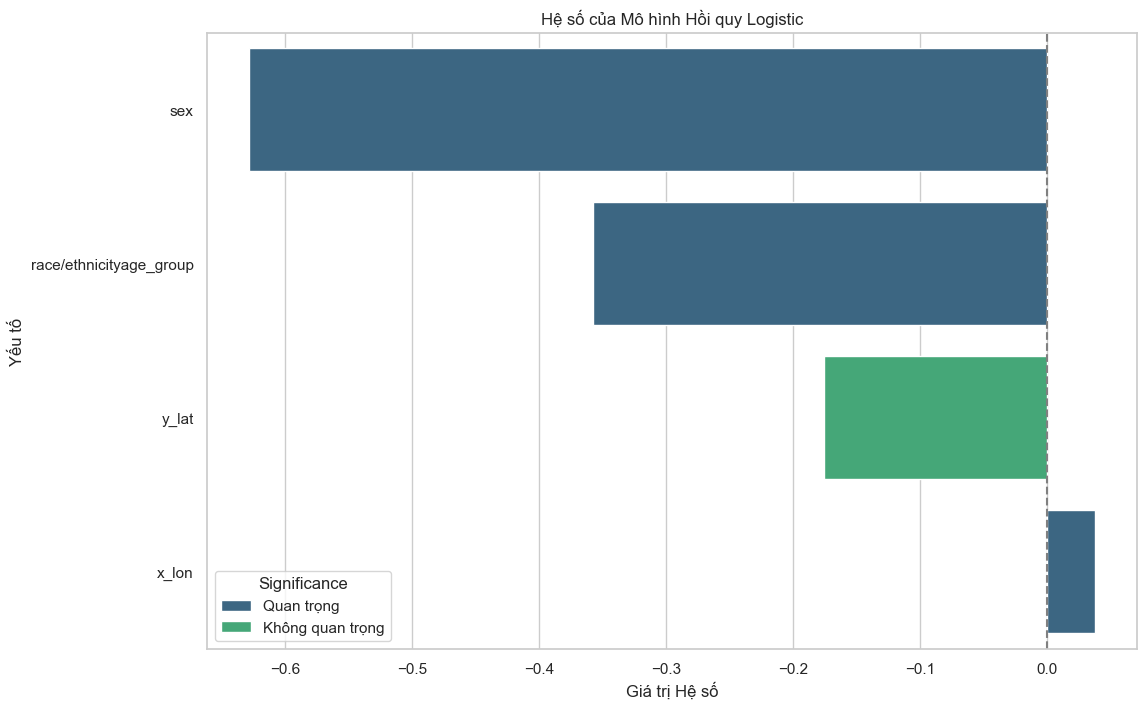

,Factors,Coefficients,P-Values,Significance
0,sex,-0.628396,8.391971e-05,Quan trọng
1,race/ethnicityage_group,-0.357382,1.079153e-04,Quan trọng
2,y_lat,-0.175453,3.449921e-08,Không quan trọng
3,x_lon,0.037843,5.075101e-04,Quan trọng


In [10]:
# Chuẩn bị dữ liệu cho hồi quy logistic
X = washington_df.drop(columns={'locationabbr', 'locationdesc', 'locationid', 'data_value'}, axis=1)  # Xóa các biến độc lập
y = washington_df['data_value']  # Biến phụ thuộc

X_const = sm.add_constant(X)

# Xây dựng mô hình hồi quy logistic
model = sm.Logit(y, X_const)
result = model.fit()

# Trích xuất hệ số và giá trị p
coefficients = result.params[1:]  # Loại bỏ hằng số
p_values = result.pvalues[1:]  # Loại bỏ hằng số cho giá trị p

# Tạo DataFrame để hiển thị
viz_df = pd.DataFrame({
    'Factors': coefficients.index,
    'Coefficients': coefficients.values,
    'P-Values': p_values.values
})

# Thêm cột cho sự quan trọng của hệ số
viz_df['Significance'] = np.where(viz_df['P-Values'] >= 1e-5, 'Quan trọng', 'Không quan trọng')

# Vẽ biểu đồ hệ số
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficients', y='Factors', data=viz_df, hue='Significance', dodge=False, palette='viridis')
plt.title('Hệ số của Mô hình Hồi quy Logistic')
plt.xlabel('Giá trị Hệ số')
plt.ylabel('Yếu tố')
plt.axvline(x=0, color='grey', linestyle='--')

plt.show()
viz_df

**Comment:** Việc visualizing các hệ số từ mô hình hồi quy logistic cung cấp cái nhìn sâu sắc về các yếu tố có liên quan chặt chẽ nhất đến sự hiện diện của bệnh tim:

- **Các yếu tố quan trọng:**
    - Giới tính: với hệ số âm, nam giới có ảnh hưởng tới xác suất dự đoán thấp hơn so với nữ giới.
    - Chủng tộc: tỉ lệ thành phần sắc tộc càng thấp, càng ảnh hưởng thấp tới xác suất dự đoán. 

- **Yếu tố không quan trọng:**
Vị trí địa lý(x_lon, y_lat): Các yếu tố này không cho thấy mối liên quan đáng kể với sự hiện diện bệnh tim trong tập dữ liệu này.

Các hệ số cung cấp ước tính về sự thay đổi trong log tỷ lệ mắc bệnh tim, trong các xử lý tiếp theo, có thể bỏ qua các thông tin về vị trí địa lý.

## Khai thác tính năng

In [11]:
median_data_value = _2019_df['data_value'].median()

In [12]:
_2019_df['data_value'] = (_2019_df['data_value'] > median_data_value).astype(int)

In [13]:
# Preparing the data with significant features for logistic regression
X_significant_features = _2019_df[['sex', 'race/ethnicityage_group']]
y = _2019_df['data_value']

# Adding a constant to the model (intercept)
X_const_significant_features = sm.add_constant(X_significant_features)

# Building the logistic regression model with significant features
model_significant_features = sm.Logit(y, X_const_significant_features)
result_significant_features = model_significant_features.fit()

# Getting the summary of the logistic regression with significant features
logit_summary_significant_features = result_significant_features.summary2()
logit_summary_significant_features

Optimization terminated successfully.
         Current function value: 0.642315
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Method:             MLE       
Dependent Variable:    data_value         Pseudo R-squared:   0.073     
Date:                  2023-12-29 14:17   AIC:                42487.4493
No. Observations:      33069              BIC:                42512.6684
Df Model:              2                  Log-Likelihood:     -21241.   
Df Residuals:          33066              LL-Null:            -22922.   
Converged:             1.0000             LLR p-value:        0.0000    
No. Iterations:        5.0000             Scale:              1.0000    
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                    1.1069   0.0234  47.3718 0.0000  1.0611  1.1527
sex                     -0.5858   0.0145 -40.3192 0.0000 -0.6143 -0.5574
race/ethnicityage_group -0.3653   0.0085 -43.0724 0.0000 -0.3819 -0.3486
========================================================================

"""

**1. Đặc trưng:**
- sex: -0.5858 - Hệ số cho biến "sex". Nếu là nam, giả sử nguy cơ giảm khoảng 0.56 lần so với nữ.
- race/ethnicityage_group: -0.3653 - Hệ số cho biến "race/ethnicityage_group". Mỗi đơn vị tăng(tăng theo tỉ lệ thành phần sắc tộc), nguy cơ giảm khoảng 0.69 lần.  


**2. Kiểm Định Thống Kê:** Cả ba hệ số đều có giá trị p-value rất thấp (0.0000), chỉ ra rằng chúng có ý nghĩa thống kê.

**3. Độ hội tụ:** Sau 5 lần lặp thì mô hình đã hội tụ, vậy mô hình đã tối ưu, giải pháp ổn định. Khi thêm các đặc trưng, sẽ không làm cho mô hình phức tạp hơn.

# II. Dự đoán data_value

In [14]:
df = pd.read_csv('Data/smoothed_rate_df.csv')

**Chọn sample:** Chọn bang có nhiều mẫu nhất để phân tích

In [15]:
location = df['locationdesc']
location.groupby(location).count().sort_values(ascending=False).head(10)

locationdesc
Washington    5140
Jefferson     4460
Franklin      3820
Jackson       3820
Montgomery    3440
Madison       3360
Lincoln       3100
Union         3080
Marion        2940
Monroe        2820
Name: locationdesc, dtype: int64

Bang có nhiều dữ liệu nhất là **Washington County**

**Sample:** Dữ liệu được chọn
- Giới tính(sex): Overall
- Sắc tộc(race/ethnicityage_group): Overall
- Tuổi(age_group): Ages 65+ years
- Địa điểm(locationdesc): Washington

In [16]:
fr_df = df[(df['sex'] == 'Overall') & (df['race/ethnicityage_group'] == 'Overall') & (df['age_group'] == 'Ages 65+ years') & (df['locationdesc'] == 'Washington')]
fr_df

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
12540,1129,2000,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,517.5,441.5,624.5
12541,1129,2001,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,525.1,450.5,623.4
12542,1129,2002,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,567.8,475.3,695.9
12543,1129,2003,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,589.9,504.5,682.8
12544,1129,2004,AL,Washington,Ages 65+ years,Overall,Overall,-88.208190,31.407577,634.5,545.1,769.7
...,...,...,...,...,...,...,...,...,...,...,...,...
467575,50023,2015,VT,Washington,Ages 65+ years,Overall,Overall,-72.614273,44.273773,504.6,439.7,588.5
467576,50023,2016,VT,Washington,Ages 65+ years,Overall,Overall,-72.614273,44.273773,499.6,413.7,575.3
467577,50023,2017,VT,Washington,Ages 65+ years,Overall,Overall,-72.614273,44.273773,544.2,473.1,637.0
467578,50023,2018,VT,Washington,Ages 65+ years,Overall,Overall,-72.614273,44.273773,563.1,473.9,655.7


## Đánh giá thuật toán

Mean Squared Error (Degree 4): 5.908283740132591e-11


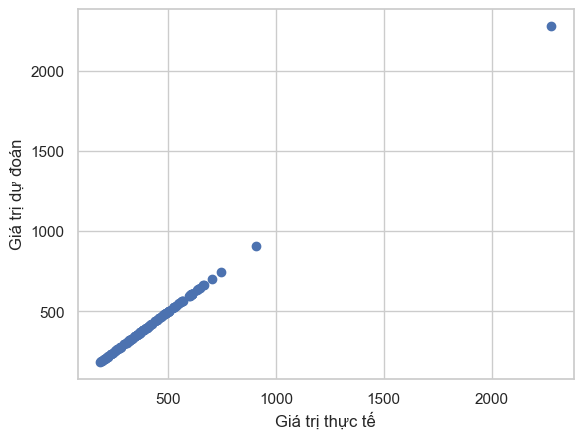

In [17]:
# Xử lý data_value
fr_df['data_value'] = pd.to_numeric(fr_df['data_value'], errors='coerce')  # Chuyển đổi 'data_value' thành số
fr_df['data_value_scaled'] = StandardScaler().fit_transform(fr_df[['data_value']])
fr_df['data_value_log'] = np.log1p(fr_df['data_value'])

# Chọn các đặc trưng (features) để làm dự đoán
features = fr_df[['year', 'data_value_scaled', 'data_value_log']]
target = fr_df['data_value'] # Chọn biến phụ thuộc để dự đoán

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Khởi tạo mô hình Polynomial Regression bậc 4
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predictions = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (Degree 4): {mse}')

plt.scatter(y_test, predictions)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.show()

Với Mean Squared Error (MSE) rất thấp, được xem là một kết quả tốt, chỉ ra rằng mô hình của có khả năng dự đoán rất gần với giá trị thực tế. Vậy mô hình đa thức bậc 4 có thể sử dụng để dự đoán data_value.

## Dự đoán data_value cho năm 2020

Dự đoán giá trị cho năm 2020: 586.344315379858


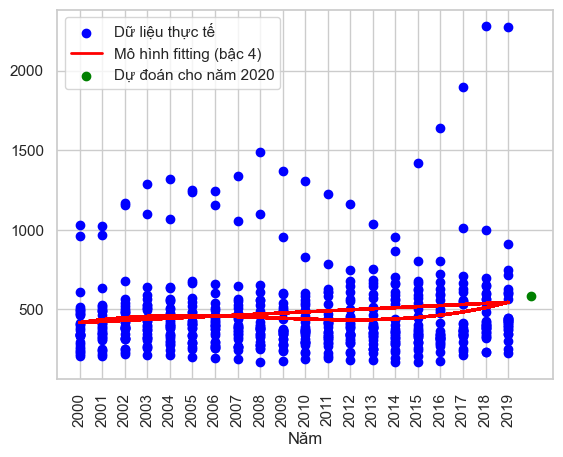

In [18]:
# Chuẩn bị dữ liệu cho fitting
X = fr_df[['year']]
y = fr_df['data_value']

# Chọn mô hình đa thức bậc 4
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Thực hiện fitting
model.fit(X, y)

# Dự đoán giá trị cho năm 2020
X_2020 = [[2020]]
predicted_value_2020 = model.predict(X_2020)
print("Dự đoán giá trị cho năm 2020:", predicted_value_2020[0])

# Vẽ đồ thị
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')
plt.plot(X, model.predict(X), color='red', linewidth=2, label=f'Mô hình fitting (bậc {degree})')
plt.scatter(2020, predicted_value_2020, color='green', marker='o', label='Dự đoán cho năm 2020')
plt.xticks(fr_df['year'].unique(), rotation=90)
plt.xlabel('Năm')
plt.legend()
plt.show()

In [19]:
# Data_value trung bình năm 2019
fr_df['data_value'][fr_df['year'] == 2019].mean()

529.7655172413793

**Comment:** 
- data_value dự đoán của năm 2020 lớn hơn với data_value trung bình của năm 2019 (586 > 529).
- Xu hướng gia tăng của data_value qua các năm.

Dựa trên các thông tin trên, giá trị dự đoán data_value của năm 2020 có thể xem xét sử dụng.

# III. Phân loại
So sánh lựa chọn mô hình thích hợp cho việc phân loại data_value dựa trên sex và race/ethnicityage

## Chia dữ liệu

In [21]:
X = _2019_df[['race/ethnicityage_group', 'sex']]
y = _2019_df['data_value']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Decision Tree Classifier

In [23]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_prediction = DT.predict(X_test)
tree_train_acc = round(accuracy_score(y_train,DT.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ' , tree_test_acc,' %')

Accuracy =  79.0  %


In [25]:
print(classification_report(

    y_test,
    DT.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3268
           1       0.76      0.86      0.81      3346

    accuracy                           0.79      6614
   macro avg       0.80      0.79      0.79      6614
weighted avg       0.80      0.79      0.79      6614



## Random Forest Classifier

In [26]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_prediction = RF.predict(X_test)
rdm_train_acc = round(accuracy_score(y_train,RF.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')

Accuracy =  79.0  %


In [28]:
print(classification_report(

    y_test,
    RF.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3268
           1       0.76      0.86      0.81      3346

    accuracy                           0.79      6614
   macro avg       0.80      0.79      0.79      6614
weighted avg       0.80      0.79      0.79      6614



## Logistic Regression Classifier

In [29]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_prediction = LR.predict(X_test)
lr_train_acc = round(accuracy_score(y_train,LR.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ',lr_test_acc ,' %')

Accuracy =  68.43  %


In [31]:
print(classification_report(

    y_test,
    LR.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      3268
           1       0.69      0.69      0.69      3346

    accuracy                           0.68      6614
   macro avg       0.68      0.68      0.68      6614
weighted avg       0.68      0.68      0.68      6614



## Kết luận:
2 mô hình **Decision Tree Classifier** và **Random Forest Classifier** thích hợp cho việc phân loại bộ dữ liệu với với accuracy = 79%